In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()

In [3]:
print digits.data.shape, digits.target.shape

(1797, 64) (1797,)


In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

/Users/miaofan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X, y = digits.data, digits.target

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

In [6]:
print X_train.shape, y_train.shape
print X_train[0]

(1257, 64) (1257, 10)
[ 0.         -0.33501649 -1.09493684  0.50949529 -1.13109185 -1.02065685
 -0.40972392 -0.12502292 -0.05907756 -0.62400926 -1.91557297  0.75962245
  0.98730398 -1.18584066 -0.51499146 -0.13043338 -0.04462507 -0.72764628
 -1.38915755  1.55269115  1.27989088 -1.09857754 -0.54880546 -0.11422184
 -0.03337973 -0.78510524 -0.49937093  1.22058589  0.8248106  -1.28625035
 -0.62889588 -0.04723238  0.         -0.67237227  0.21078478  1.10556952
  0.45489876 -1.48986148 -0.82269451  0.         -0.06134367 -0.5312841
  0.17113031  1.36217503  1.17098727 -1.27091315 -0.79827225 -0.08874162
 -0.03543326 -0.40357499 -0.62147837  1.23639392  1.24208282 -0.45750018
 -0.75743581 -0.20978513 -0.02359646 -0.29908135 -1.08938309  0.20829258
  0.03869656 -1.14664746 -0.5056698  -0.19600752]


In [7]:
import tensorflow as tf

In [8]:
INPUT_UNITS = 64
HIDDEN_UNITS = [50]
N_CLASSES = 10
KEEP_PROB = 0.5
LEARNING_RATE = 0.1
TRAINING_ITER = 2000


def init_weights(shape):
    return tf.Variable(tf.random_normal(shape))

def init_biases(shape):
    return tf.Variable(tf.zeros(shape) + 0.1)

def add_layer(x, weights, biases, keep_prob, activation_function = None):
    score = tf.matmul(x, weights) + biases
    
    if activation_function:
        return tf.nn.dropout(activation_function(score), keep_prob)
    else:
        return tf.nn.dropout(score, keep_prob)

In [9]:
x = tf.placeholder(tf.float32, [None, INPUT_UNITS])
y = tf.placeholder(tf.float32, [None, N_CLASSES])
keep_prob = tf.placeholder(tf.float32)

weights = {'l1': init_weights([INPUT_UNITS, HIDDEN_UNITS[0]]), 'l2': init_weights([HIDDEN_UNITS[0], N_CLASSES])}
biases = {'l1': init_biases([HIDDEN_UNITS[0]]), 'l2': init_biases([N_CLASSES])}

h1 = add_layer(x, weights['l1'], biases['l1'], keep_prob, tf.nn.relu)

#h2 = add_layer(h1, weights['l2'], biases['l2'], keep_prob, tf.nn.tanh)

predictions = add_layer(h1, weights['l2'], biases['l2'], 1.0, None)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=predictions))

train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y, 1), tf.arg_max(predictions, 1)), tf.float32))



In [10]:
init = tf.global_variables_initializer()

epoch = []

train_acc = []
test_acc = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(TRAINING_ITER):
        sess.run(train_step, feed_dict = {x: X_train, y: y_train, keep_prob: 1.0})
        
        if i % 50 == 0:
            epoch.append(i)
            
            print 'TRAIN_LOSS@%d:' %i, sess.run(loss, feed_dict = {x: X_train, y: y_train, keep_prob: 1.0})
            train_acc.append(sess.run(accuracy, feed_dict = {x: X_train, y: y_train, keep_prob: 1.0}))
            print 'TEST_LOSS@%d:' %i, sess.run(loss, feed_dict = {x: X_test, y: y_test, keep_prob: 1.0})
            test_acc.append(sess.run(accuracy, feed_dict = {x: X_test, y: y_test, keep_prob: 1.0}))

plt.title('DIGIT_MLN_DROPOUT')
train_line, = plt.plot(epoch, train_acc, 'r-', label='Train-keep-prob: 1.0')

test_line, = plt.plot(epoch, test_acc, 'b-', label='Test-keep-prob: 1.0')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')

TRAIN_LOSS@0: 38.4874
TEST_LOSS@0: 38.9495
TRAIN_LOSS@50: 1.25937
TEST_LOSS@50: 3.07837
TRAIN_LOSS@100: 0.468905
TEST_LOSS@100: 2.32762
TRAIN_LOSS@150: 0.239498
TEST_LOSS@150: 2.12294
TRAIN_LOSS@200: 0.133417
TEST_LOSS@200: 2.01681
TRAIN_LOSS@250: 0.0845236
TEST_LOSS@250: 1.94062
TRAIN_LOSS@300: 0.0641747
TEST_LOSS@300: 1.88991
TRAIN_LOSS@350: 0.052511
TEST_LOSS@350: 1.85718
TRAIN_LOSS@400: 0.0448192
TEST_LOSS@400: 1.83358
TRAIN_LOSS@450: 0.0385924
TEST_LOSS@450: 1.81548
TRAIN_LOSS@500: 0.0330258
TEST_LOSS@500: 1.80099
TRAIN_LOSS@550: 0.0280479
TEST_LOSS@550: 1.7904
TRAIN_LOSS@600: 0.0236367
TEST_LOSS@600: 1.7843
TRAIN_LOSS@650: 0.0195731
TEST_LOSS@650: 1.78248
TRAIN_LOSS@700: 0.0156954
TEST_LOSS@700: 1.78375
TRAIN_LOSS@750: 0.0119886
TEST_LOSS@750: 1.78601
TRAIN_LOSS@800: 0.00839939
TEST_LOSS@800: 1.78943
TRAIN_LOSS@850: 0.00536926
TEST_LOSS@850: 1.79131
TRAIN_LOSS@900: 0.00396934
TEST_LOSS@900: 1.78568
TRAIN_LOSS@950: 0.00327716
TEST_LOSS@950: 1.77842
TRAIN_LOSS@1000: 0.00283275
TEST

TRAIN_LOSS@0: 45.9471
TEST_LOSS@0: 48.5646
TRAIN_LOSS@50: 1.45504
TEST_LOSS@50: 2.20316
TRAIN_LOSS@100: 0.636273
TEST_LOSS@100: 1.32716
TRAIN_LOSS@150: 0.374345
TEST_LOSS@150: 1.01594
TRAIN_LOSS@200: 0.252821
TEST_LOSS@200: 0.870478
TRAIN_LOSS@250: 0.184118
TEST_LOSS@250: 0.732364
TRAIN_LOSS@300: 0.152072
TEST_LOSS@300: 0.688636
TRAIN_LOSS@350: 0.126143
TEST_LOSS@350: 0.634294
TRAIN_LOSS@400: 0.108949
TEST_LOSS@400: 0.596334
TRAIN_LOSS@450: 0.0944738
TEST_LOSS@450: 0.56161
TRAIN_LOSS@500: 0.081578
TEST_LOSS@500: 0.505243
TRAIN_LOSS@550: 0.0723223
TEST_LOSS@550: 0.488462
TRAIN_LOSS@600: 0.0674514
TEST_LOSS@600: 0.461601
TRAIN_LOSS@650: 0.0618676
TEST_LOSS@650: 0.457365
TRAIN_LOSS@700: 0.0597484
TEST_LOSS@700: 0.453548
TRAIN_LOSS@750: 0.0602785
TEST_LOSS@750: 0.437523
TRAIN_LOSS@800: 0.0573785
TEST_LOSS@800: 0.416215
TRAIN_LOSS@850: 0.0556188
TEST_LOSS@850: 0.417351
TRAIN_LOSS@900: 0.0542399
TEST_LOSS@900: 0.40181
TRAIN_LOSS@950: 0.0506803
TEST_LOSS@950: 0.406672
TRAIN_LOSS@1000: 0.04925

<IPython.core.display.Javascript object>


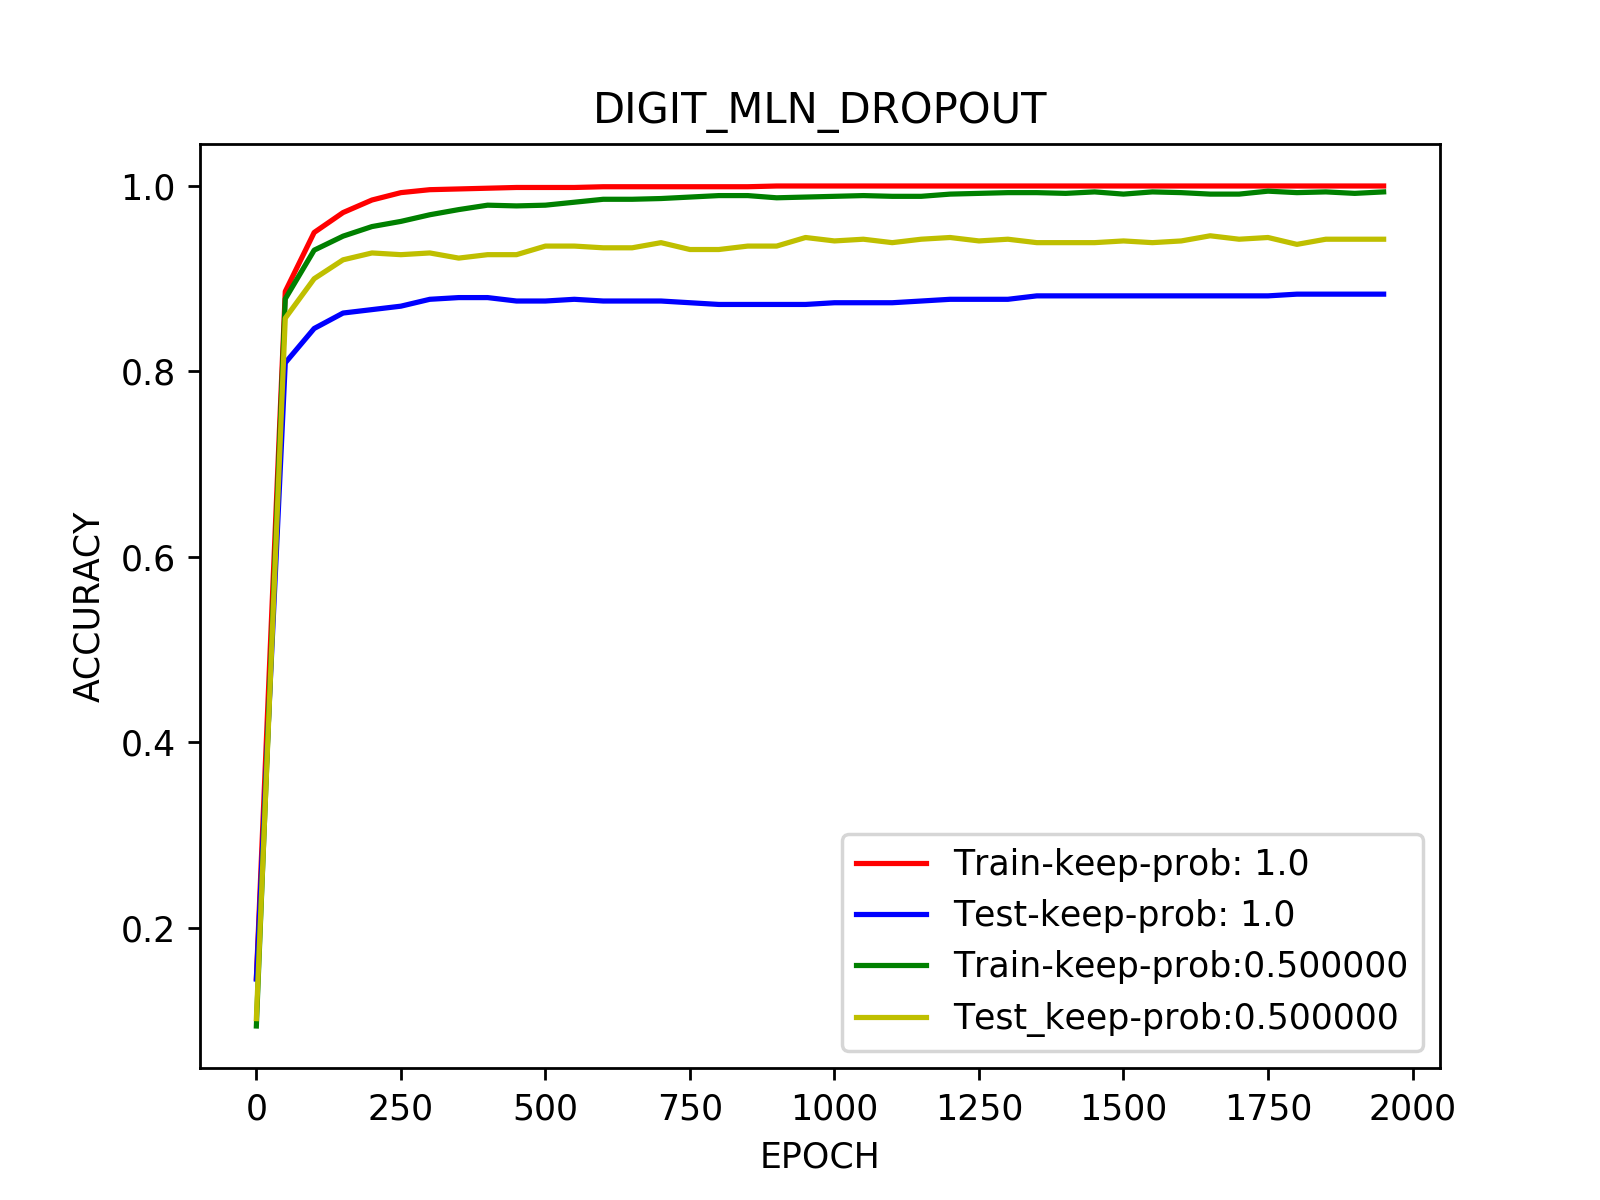

In [11]:
train_acc = []
test_acc = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(TRAINING_ITER):
        sess.run(train_step, feed_dict = {x: X_train, y: y_train, keep_prob: KEEP_PROB})
        
        if i % 50 == 0:
            print 'TRAIN_LOSS@%d:' %i, sess.run(loss, feed_dict = {x: X_train, y: y_train, keep_prob: 1.0})
            train_acc.append(sess.run(accuracy, feed_dict = {x: X_train, y: y_train, keep_prob: 1.0}))
            
            print 'TEST_LOSS@%d:' %i, sess.run(loss, feed_dict = {x: X_test, y: y_test, keep_prob: 1.0})
            test_acc.append(sess.run(accuracy, feed_dict = {x: X_test, y: y_test, keep_prob: 1.0}))
            
            
train_dropout_line, = plt.plot(epoch, train_acc, 'g-', label='Train-keep-prob:%f' %KEEP_PROB)

test_dropout_line, = plt.plot(epoch, test_acc, 'y-', label='Test_keep-prob:%f' %KEEP_PROB)

plt.legend(handles = [train_line, test_line, train_dropout_line, test_dropout_line])
plt.show()